# IBS 574 Python Homework 3

#### Add your name and the date your notebook was last updated

In [4]:
%reload_ext watermark
%watermark -a "Sydney Sunna" -d -t -u -n -z

Sydney Sunna 
last updated: 2020-02-11 14:54:08 Eastern Standard Time


#### Load libraries

In [5]:
import pandas as pd
import numpy as np
from sinfo import sinfo
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random
import matplotlib.pyplot as plt

#### Load data
note: include test for this chunk from previous homework

In [6]:
countdata = "https://raw.githubusercontent.com/jessmrandall/IBS574Spring2020/master/data/countdata.csv"
counts = pd.read_csv(countdata, index_col = 0, sep = "\t")

#### Prepare data for PCA Analysis

In [7]:
counts_transpose = counts.T
len(counts_transpose) == 14
group = ['Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case']
counts_transpose['group'] = group
features = pd.Series(counts_transpose.columns)[0:14944]
feature_arr = counts_transpose.loc[:, features].values
target_arr = counts_transpose.loc[:, ['group']].values
fitted_features = StandardScaler().fit_transform(feature_arr)


#### Determine Principal Components
note: include test for this chunk from previous homework

In [11]:
pca = PCA(n_components=2)
random.seed(2136044)
pca=PCA(n_components = 2, random_state = 2136044)
principalComponents = pca.fit_transform(fitted_features)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2'])
principalDataframe.index = counts_transpose.index
targetDataframe = counts_transpose[['group']]
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe

,PC1,PC2,group
T02,126.578151,22.172512,Control
T04,99.182056,1.424350,Control
T06,75.563747,-19.338757,Control
T08,50.782996,-40.197730,Control
T10,2.998503,-81.795995,Control
T12,-14.584119,-78.680747,Control
T14,-2.030800,-62.421594,Control
T01,-77.569590,-40.686478,Case
T03,-77.841672,-19.285563,Case
T05,-81.150428,-13.488447,Case


#### Graph the principal components by sample group

Text(-100, 100, 'Case')

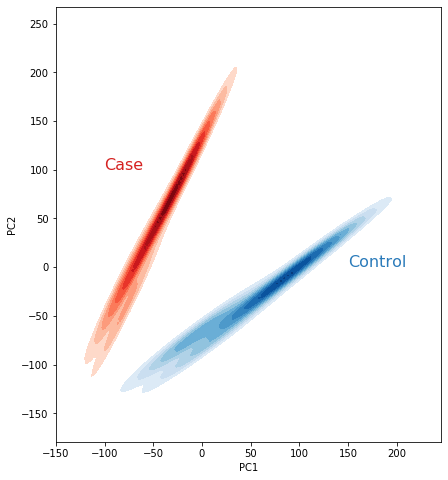

In [21]:

#iris is newDataframe
#subset
Case = newDataframe.query("group == 'Case'")
Control = newDataframe.query("group == 'Control'")
f, ax = plt.subplots(figsize=(8, 8)) # makes empty box
ax.set_aspect("equal")
ax = sns.kdeplot(Case.PC1, Case.PC2,
                cmap= "Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(Control.PC1, Control.PC2,
                cmap= "Blues", shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(150, 0, "Control", size=16, color=blue)
ax.text(-100, 100, "Case", size=16, color=red)

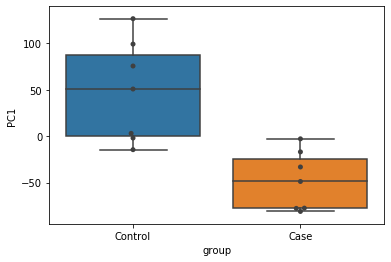

In [28]:
ax = sns.boxplot(x="group", y="PC1", data= newDataframe)
ax = sns.swarmplot(x="group", y="PC1", data=newDataframe, color=".25")

#### Interpret the graph for your principal investigator using explained variance

In [12]:
#explained variance tells you how much variance is explained by each principal component (due to the fact that your samples are in a group)
#pca documentation in scikitlearn look up explained_variance_ratio for more info https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca.explained_variance_ratio_

#first number is represented by PC1 and the second one is PC2 hopefully PC1 explains far more variance than PC2 haha


array([0.39218002, 0.36808828])

Aproximately 39 % of the variability between these sample groups is explained by a sample being either a case or a control. Approximately 37 % can be attributed to another variable unaccounted for in the experimental design.

Between these two principal components, we can account for rouchly 80% of the variance in the data.

#### Report Session Information


In [13]:
sinfo()

-----
numpy       1.18.1
pandas      1.0.0
seaborn     0.10.0
sinfo       0.3.1
sklearn     0.22.1
-----
IPython             7.12.0
jupyter_client      5.3.4
jupyter_core        4.6.1
jupyterlab          1.2.6
notebook            6.0.3
-----
Python 3.8.1 (default, Jan  8 2020, 15:55:49) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.18362-SP0
8 logical CPU cores, Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
-----
Session information updated at 2020-02-11 14:25
